# pandas 데이터 파악과 조작

**분석할 데이터를 수집(확보)하면 데이터의 특징을 파악하고 다루기 쉽게 변형하는 작업을 수행해야 한다**

# #3. 데이터 정제와 변환

#### 데이터 정제
- 누락 데이터(NaN) 처리
- 중복 데이터 처리

#### 데이터 변환
- 데이터 표준화 : 단위 환산, 자료형 변환
- 데이터 정규화
- 범주형 데이터 처리 : 구간 분할, 더미변수
- 시계열 데이터 처리

-------------------------------------

In [1]:
import numpy as np
import pandas as pd

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [4]:
import warnings
warnings.filterwarnings(action='ignore')

## 1. 데이터 정제

- 누락데이터 처리
- 중복데이터 처리

### 1-1. 누락데이터(missing value) 처리

- 누락데이터 확인 : isnull(), notnull(), isna(), notna()
- 누락데이터 삭제 : dropna()
- 누락데이터 치환 : fillna()

### 1) 누락데이터 확인

- isna() 또는 isnull()
- 결측치인 경우 True 반환 
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html

In [16]:
import seaborn as sns

titanic = sns.load_dataset('titanic')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [17]:
# 컬럼별 누락데이터 확인
titanic.isna()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [26]:
# 컬럼별 누락데이터 개수 확인
titanic.isna().sum()
# titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [20]:
#결측치가 있는 컬럼명 추출
titanic.isna().sum() == 0

titanic.isna().any().loc[lambda x : x].index

survived        True
pclass          True
sex             True
age            False
sibsp           True
parch           True
fare            True
embarked       False
class           True
who             True
adult_male      True
deck           False
embark_town    False
alive           True
alone           True
dtype: bool

Index(['age', 'embarked', 'deck', 'embark_town'], dtype='object')

In [21]:
#결측치가 있는 컬럼명 추출
s_na = titanic.isna().sum()
list(s_na[s_na != 0].index)

['age', 'embarked', 'deck', 'embark_town']

In [22]:
# 컬럼별 정상데이터 개수 확인 : notnull(), notna()
s_na[s_na == 0]

survived      0
pclass        0
sex           0
sibsp         0
parch         0
fare          0
class         0
who           0
adult_male    0
alive         0
alone         0
dtype: int64

In [25]:
# 컬럼별 정상데이터 개수 확인 : notnull(), notna()
titanic.notna().sum()
#titanic.notnull().sum()

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64

### 2) 누락데이터 제거

**dropna**(*, axis=0, how='any', thresh=_NoDefault.no_default, subset=None, inplace=False)

- axis :
    - 0 or 'index' : 결측치를 포함하는 행들을 삭제
    - 1 or 'columns' : 결측치를 포함하는 열들을 삭제

- how : 
    - 'any' : NaN이 하나라도 존재하면 삭제    
    - 'all' : 모든 데이터가 NaN인 경우 삭제  
    
- thresh : 지정된 개수 이상의 NaN이 있는 경우 삭제
- subset : 결측치 삭제할 컬럼 이름들 (리스트형식)
- inplace : True이면 기존 데이터 변환


https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html

#### NaN이 500개 이상인 열을 모두 삭제

In [28]:
df = titanic.dropna(axis=1, thresh=500)
df.info() #NaN이 688개인 deck이 없어짐

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


#### age 열에 나이 데이터가 없는 모든 행 삭제

In [31]:
df2 = df.dropna(axis=0, subset='age', how='any') #subset: column의 이름
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     714 non-null    int64   
 1   pclass       714 non-null    int64   
 2   sex          714 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        714 non-null    int64   
 5   parch        714 non-null    int64   
 6   fare         714 non-null    float64 
 7   embarked     712 non-null    object  
 8   class        714 non-null    category
 9   who          714 non-null    object  
 10  adult_male   714 non-null    bool    
 11  embark_town  712 non-null    object  
 12  alive        714 non-null    object  
 13  alone        714 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 69.2+ KB


### 3) 누락데이터 치환

**fillna**(value=None, *, method=None, axis=None, inplace=False, limit=None, downcast=None)

- value : 결측치를 치환할 값(여러개인 경우: 딕셔너리)
- method : forward/backward fill 방식 {'backfill', 'bfill', 'pad', 'ffill', None}
    - pad / ffill: NaN이 있는 행의 직전(forward) 행의 값으로 대체
    - backfill / bfill: NaN이 있는 행 바로 다음(backward) 행의 값으로 대체
    - **pd.bfill(), pd.bfill() 메소드를 사용할 것**

- axis : 결측치 치환할 방향 {0 or 'index', 1 or 'columns'}

- inplace : bool, default False

- limit : 치환 회수 {int, default None}
    - method 인수가 설정된 경우 method치환을 적용할 최대 수
    - method 인수가 설정되지 않은 경우 컬럼별로 위에서 부터 지정한 회수만큼 치환
    
- downcast : dict, default is None
    - A dict of item->dtype of what to downcast if possible

#### 평균값으로 치환

In [33]:
mean_age = titanic.age.mean()
print(f'평균나이:{mean_age}')

평균나이:29.69911764705882


In [35]:
titanic.age.head(10)

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: age, dtype: float64

In [36]:
titanic.age.fillna(mean_age, inplace=True)
titanic.age.head(10)

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: age, dtype: float64

In [37]:
titanic.age.mean()

29.69911764705882

#### 가장 많이 나오는 값으로 치환

In [45]:
# embark_town (embarked) 컬럼이 결측치인 관측값 추출
titanic.embark_town.isna()
titanic[titanic.embark_town.isna()]

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: embark_town, Length: 891, dtype: bool

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


In [44]:
# embark_town의 빈도
titanic.embark_town.value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [49]:
# embark_town의 빈도
titanic.embark_town.value_counts().max()

644

In [48]:
# embark_town의 빈도
titanic.embark_town.value_counts().idxmax() #최대값을 갖는 인덱스의 이름을 가져옴

'Southampton'

In [50]:
most = titanic.embark_town.value_counts().idxmax()
titanic.embark_town.fillna(most).iloc[[61,829]]

61     Southampton
829    Southampton
Name: embark_town, dtype: object

#### 이웃하는 데이터 값으로 치환

- 데이터 유사성
- fillna(method='ffill' | 'pad' | 'bfill' | 'backfill') 
- ffill(), pad(), bfill(), backfill()

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html

In [52]:
titanic.iloc[59:64]
titanic.iloc[827:832]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
59,0,3,male,11.0,5,2,46.9000,S,Third,child,False,NaN,Southampton,no,False
60,0,3,male,22.0,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
61,1,1,female,38.0,0,0,80.0000,NaN,First,woman,False,B,NaN,yes,True
62,0,1,male,45.0,1,0,83.4750,S,First,man,True,C,Southampton,no,False
63,0,3,male,4.0,3,2,27.9000,S,Third,child,False,NaN,Southampton,no,False


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
827,1,2,male,1.000000,0,2,37.0042,C,Second,child,False,NaN,Cherbourg,yes,False
828,1,3,male,29.699118,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,yes,True
829,1,1,female,62.000000,0,0,80.0000,NaN,First,woman,False,B,NaN,yes,True
830,1,3,female,15.000000,1,0,14.4542,C,Third,child,False,NaN,Cherbourg,yes,False
831,1,2,male,0.830000,1,1,18.7500,S,Second,child,False,NaN,Southampton,yes,False


- 바로 앞의 값으로 치환 (method='ffill | pad') => ffill(), pad()

In [53]:
titanic.embark_town.ffill().iloc[[60, 61, 62, 828, 829, 830]]

60       Cherbourg
61       Cherbourg
62     Southampton
828     Queenstown
829     Queenstown
830      Cherbourg
Name: embark_town, dtype: object

- 바로 뒤의 값으로 치환 (method='bfill | backfill')

In [54]:
titanic.embark_town.bfill().iloc[[60, 61, 62, 828, 829, 830]]

60       Cherbourg
61     Southampton
62     Southampton
828     Queenstown
829      Cherbourg
830      Cherbourg
Name: embark_town, dtype: object

[정리]

- fillna()의 method = 'ffill' 또는 'pad'와 동일한 메서드 : ffill(), pad()
- fillna()의 method = 'bfill' 또는 'backfill'와 동일한 메서드 : bfill(), backfill()

In [55]:
col  = ['col1','col2','col3','col4','col5']
row  = ['row1','row2','row3','row4','row5', 'row6']
na = np.nan
data = [[na, 2,na, 4,na],
        [ 6, 7,na, 9,na],
        [11,na,na,14,15],
        [na,17, 3,na,20],
        [na,22,na,na,25],
        [na,na, 5, 3,na]]
df = pd.DataFrame(data,row,col)
df

,col1,col2,col3,col4,col5
row1,NaN,2.0,NaN,4.0,NaN
row2,6.0,7.0,NaN,9.0,NaN
row3,11.0,NaN,NaN,14.0,15.0
row4,NaN,17.0,3.0,NaN,20.0
row5,NaN,22.0,NaN,NaN,25.0
row6,NaN,NaN,5.0,3.0,NaN


#### 컬럼별 결측치 치환 값이 다른 경우

- fillna()의 value 인수

In [56]:
df.fillna({'col1':'A', 'col2':'B', 'col3':'C', 'col4':'D', 'col5':'E'})

,col1,col2,col3,col4,col5
row1,A,2.0,C,4.0,E
row2,6.0,7.0,C,9.0,E
row3,11.0,B,C,14.0,15.0
row4,A,17.0,3.0,D,20.0
row5,A,22.0,C,D,25.0
row6,A,B,5.0,3.0,E


#### 결측치 변경 수행횟수 제한

- fillna()의 limit 인수
- method 인수가 설정된 경우 method치환을 적용할 최대 수
- method 인수가 설정되지 않은 경우 컬럼별로 위에서 부터 지정한 회수만큼 치환

In [58]:
df
df.fillna('A', limit=1) #각컬럼별로 하나씩 A 적용

,col1,col2,col3,col4,col5
row1,NaN,2.0,NaN,4.0,NaN
row2,6.0,7.0,NaN,9.0,NaN
row3,11.0,NaN,NaN,14.0,15.0
row4,NaN,17.0,3.0,NaN,20.0
row5,NaN,22.0,NaN,NaN,25.0
row6,NaN,NaN,5.0,3.0,NaN


,col1,col2,col3,col4,col5
row1,A,2.0,A,4.0,A
row2,6.0,7.0,NaN,9.0,NaN
row3,11.0,A,NaN,14.0,15.0
row4,NaN,17.0,3.0,A,20.0
row5,NaN,22.0,NaN,NaN,25.0
row6,NaN,NaN,5.0,3.0,NaN


In [59]:
df.fillna('A', limit=3) #컬럼당 3개까지 채우기 

,col1,col2,col3,col4,col5
row1,A,2.0,A,4.0,A
row2,6.0,7.0,A,9.0,A
row3,11.0,A,A,14.0,15.0
row4,A,17.0,3.0,A,20.0
row5,A,22.0,NaN,A,25.0
row6,NaN,A,5.0,3.0,A


In [61]:
df
df.fillna(method='ffill', limit=2)

,col1,col2,col3,col4,col5
row1,NaN,2.0,NaN,4.0,NaN
row2,6.0,7.0,NaN,9.0,NaN
row3,11.0,NaN,NaN,14.0,15.0
row4,NaN,17.0,3.0,NaN,20.0
row5,NaN,22.0,NaN,NaN,25.0
row6,NaN,NaN,5.0,3.0,NaN


,col1,col2,col3,col4,col5
row1,NaN,2.0,NaN,4.0,NaN
row2,6.0,7.0,NaN,9.0,NaN
row3,11.0,7.0,NaN,14.0,15.0
row4,11.0,17.0,3.0,14.0,20.0
row5,11.0,22.0,3.0,14.0,25.0
row6,NaN,22.0,5.0,3.0,25.0


In [62]:
df
df.fillna(method='bfill', limit=2)

,col1,col2,col3,col4,col5
row1,NaN,2.0,NaN,4.0,NaN
row2,6.0,7.0,NaN,9.0,NaN
row3,11.0,NaN,NaN,14.0,15.0
row4,NaN,17.0,3.0,NaN,20.0
row5,NaN,22.0,NaN,NaN,25.0
row6,NaN,NaN,5.0,3.0,NaN


,col1,col2,col3,col4,col5
row1,6.0,2.0,NaN,4.0,15.0
row2,6.0,7.0,3.0,9.0,15.0
row3,11.0,17.0,3.0,14.0,15.0
row4,NaN,17.0,3.0,3.0,20.0
row5,NaN,22.0,5.0,3.0,25.0
row6,NaN,NaN,5.0,3.0,NaN


---------

## 1-2. 중복데이터(duplicate data) 처리

- 중복데이터 확인 : duplicated()
- 중복데이터 제거 : drop_duplicates()

### 1) 중복데이터 확인

**duplicated**(subset=None, keep='first')

- keep : {'first','last', False}, default='first'
    - first : 위부터 검사
    - last : 마지막부터 검사
    - False : Mark all duplicates as True.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html

In [76]:
df = pd.DataFrame({'c1':['a','a','b','a','b'],
                   'c2': [1, 1, 1, 2, 2],
                   'c3': [1, 1, 2, 2, 2]})
df

,c1,c2,c3
0,a,1,1
1,a,1,1
2,b,1,2
3,a,2,2
4,b,2,2


In [64]:
df.duplicated()

0    False
1     True
2    False
3    False
4    False
dtype: bool

In [77]:
df.c1.duplicated()

0    False
1     True
2    False
3     True
4     True
Name: c1, dtype: bool

In [66]:
df.duplicated(keep='last')

0     True
1    False
2    False
3    False
4    False
dtype: bool

In [68]:
df.c2.duplicated()
df.duplicated(subset='c2')

0    False
1     True
2     True
3    False
4     True
Name: c2, dtype: bool

0    False
1     True
2     True
3    False
4     True
dtype: bool

### 2) 중복데이터 제거

**drop_duplicates**(subset=None, *, keep='first', inplace=False, ignore_index=False)

In [72]:
df
df.drop_duplicates()

,c1,c2,c3
0,a,1,1
1,a,1,1
2,b,1,2
3,a,2,2
4,b,2,2


,c1,c2,c3
0,a,1,1
2,b,1,2
3,a,2,2
4,b,2,2


In [73]:
df
df.drop_duplicates(subset=['c2', 'c3'])

,c1,c2,c3
0,a,1,1
1,a,1,1
2,b,1,2
3,a,2,2
4,b,2,2


,c1,c2,c3
0,a,1,1
2,b,1,2
3,a,2,2


In [74]:
df.drop_duplicates(keep='last') #last 거꾸로 순서로 0번이 삭제됨

,c1,c2,c3
1,a,1,1
2,b,1,2
3,a,2,2
4,b,2,2


----

## 2. 데이터 변환 

- 데이터 변환 : 단위 환산, 자료형 변환
- 범주형 데이터 처리 : 구간 분할, 더미변수
- 데이터 정규화 및 표준화
- 시계열 데이터 처리

### 2-1. 데이터 변환

- 단위환산
- 자료형 변환

#### 예제데이터. UCI 자동차 연비 데이터(Auto_MPG)

https://archive.ics.uci.edu/ml/datasets/Auto+MPG

분산: 평균과 얼마나 떨어져 있는가 / 공분산 : 두 변수를 동시에 x의 평균, y의 평균(x-x')*(y-y')

In [79]:
auto = pd.read_csv('auto_mpg.csv', header=None)
auto.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [80]:
#컬럼에 이름 넣어주기
#mpg - mile per gallon(연비)
auto.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
                'acceleration', 'model_year', 'origin','name']
auto.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger
397,31.0,4,119.0,82.00,2720.0,19.4,82,1,chevy s-10


### 1) 단위환산

##### 'mpg' 컬럼의 단위 환산
- mile per gallon
- kilo meter per liter(km/l)로 환산
    - 1 mile = 1.60934km
    - 1 gallon = 3.78541L

In [81]:
auto['km/L']=auto.mpg * 1.60934 / 3.78541
auto.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,km/L
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,7.652571
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,6.377143
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,7.652571


##### Series.round(decimals=0, *args, **kwargs) 메서드

In [84]:
auto['km/L'] = auto['km/L'].round(2) #소숫점 둘째자리로 만들기
auto.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,km/L
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,7.65
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,6.38


### 2) 자료형 변환

#### 컬럼별 데이터 유형

In [85]:
auto.dtypes #데이터 유형

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model_year        int64
origin            int64
name             object
km/L            float64
dtype: object

In [87]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
 9   km/L          398 non-null    float64
dtypes: float64(5), int64(3), object(2)
memory usage: 31.2+ KB


#### 'horsepower' 컬럼

- 자동차 마력
- 수치형이나 문자열로 저장되어 있음

In [90]:
auto.horsepower.value_counts()
auto.horsepower.unique()

horsepower
150.0    22
90.00    20
88.00    19
110.0    18
100.0    17
         ..
61.00     1
93.00     1
148.0     1
152.0     1
82.00     1
Name: count, Length: 94, dtype: int64

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

- 'horsepower' 값 중  '?'을  NaN으로 치환

In [91]:
auto[auto.horsepower == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,km/L
32,25.0,4,98.0,?,2046.0,19.0,71,1,ford pinto,10.63
126,21.0,6,200.0,?,2875.0,17.0,74,1,ford maverick,8.93
330,40.9,4,85.0,?,1835.0,17.3,80,2,renault lecar deluxe,17.39
336,23.6,4,140.0,?,2905.0,14.3,80,1,ford mustang cobra,10.03
354,34.5,4,100.0,?,2320.0,15.8,81,2,renault 18i,14.67
374,23.0,4,151.0,?,3035.0,20.5,82,1,amc concord dl,9.78


In [92]:
auto.horsepower.replace('?', np.NaN, inplace=True)

In [93]:
auto.iloc[[32,126,330,336,354,374]]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,km/L
32,25.0,4,98.0,NaN,2046.0,19.0,71,1,ford pinto,10.63
126,21.0,6,200.0,NaN,2875.0,17.0,74,1,ford maverick,8.93
330,40.9,4,85.0,NaN,1835.0,17.3,80,2,renault lecar deluxe,17.39
336,23.6,4,140.0,NaN,2905.0,14.3,80,1,ford mustang cobra,10.03
354,34.5,4,100.0,NaN,2320.0,15.8,81,2,renault 18i,14.67
374,23.0,4,151.0,NaN,3035.0,20.5,82,1,amc concord dl,9.78


In [94]:
auto.horsepower.unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', nan, '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

- 'horsepower'의 결측치 제거 후 문자열을 실수형으로 변환

In [96]:
auto.dropna(subset=['horsepower'], inplace=True)
auto.horsepower.unique()
auto.info()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
 9   km/L          392 non-null    float64
dtypes: float64(5), int64(3), object(2)
memory usage: 33.7+ KB


In [97]:
auto.horsepower = auto.horsepower.astype('float')
auto.horsepower.dtype

dtype('float64')

#### 'origin' 컬럼

- 정수형 데이터 1, 2, 3 : 국가이름 'USA', 'EU', 'JPN'을 의미함

In [101]:
auto.origin.unique()
auto.origin.value_counts()

array([1, 3, 2])

origin
1    245
3     79
2     68
Name: count, dtype: int64

- 정수값을 국가 이름으로 치환

In [102]:
auto.origin.replace({1:'USA', 2:'EU', 3:'JPN'}, inplace=True)
auto.origin.unique()

array(['USA', 'JPN', 'EU'], dtype=object)

- 범주형(category) 데이터로 변환

In [103]:
auto.origin = auto.origin.astype('category')
auto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           392 non-null    float64 
 1   cylinders     392 non-null    int64   
 2   displacement  392 non-null    float64 
 3   horsepower    392 non-null    float64 
 4   weight        392 non-null    float64 
 5   acceleration  392 non-null    float64 
 6   model_year    392 non-null    int64   
 7   origin        392 non-null    category
 8   name          392 non-null    object  
 9   km/L          392 non-null    float64 
dtypes: category(1), float64(6), int64(2), object(1)
memory usage: 31.1+ KB


#### 'model_year' 컬럼

: 모델 출시 연도

- sample() 메서드로 무작위로 3개 행을 선택하여 출력

In [104]:
auto.model_year.value_counts(sort=False)

model_year
70    29
71    27
72    28
73    40
74    26
75    30
76    34
77    28
78    36
79    29
80    27
81    28
82    30
Name: count, dtype: int64

In [105]:
auto.sample(10) #랜덤하게 10개 가져옴

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,km/L
161,16.0,6,250.0,105.0,3897.0,18.5,75,USA,chevroelt chevelle malibu,6.80
37,18.0,6,232.0,100.0,3288.0,15.5,71,USA,amc matador,7.65
309,41.5,4,98.0,76.0,2144.0,14.7,80,EU,vw rabbit,17.64
388,26.0,4,156.0,92.0,2585.0,14.5,82,USA,chrysler lebaron medallion,11.05
188,16.0,8,318.0,150.0,4190.0,13.0,76,USA,dodge coronet brougham,6.80
172,25.0,4,90.0,71.0,2223.0,16.5,75,EU,volkswagen dasher,10.63
75,14.0,8,318.0,150.0,4077.0,14.0,72,USA,plymouth satellite custom (sw),5.95
347,37.0,4,85.0,65.0,1975.0,19.4,81,JPN,datsun 210 mpg,15.73
209,19.0,4,120.0,88.0,3270.0,21.9,76,EU,peugeot 504,8.08
175,29.0,4,90.0,70.0,1937.0,14.0,75,EU,volkswagen rabbit,12.33


In [106]:
auto.model_year.sample(10)

373    82
341    81
115    73
186    76
332    80
187    76
65     72
245    78
220    77
1      70
Name: model_year, dtype: int64

- 범주형 데이터로 변환

In [107]:
auto.model_year = auto.model_year.astype('category')
auto.info()
auto.model_year.unique()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           392 non-null    float64 
 1   cylinders     392 non-null    int64   
 2   displacement  392 non-null    float64 
 3   horsepower    392 non-null    float64 
 4   weight        392 non-null    float64 
 5   acceleration  392 non-null    float64 
 6   model_year    392 non-null    category
 7   origin        392 non-null    category
 8   name          392 non-null    object  
 9   km/L          392 non-null    float64 
dtypes: category(2), float64(6), int64(1), object(1)
memory usage: 29.1+ KB


[70, 71, 72, 73, 74, ..., 78, 79, 80, 81, 82]
Length: 13
Categories (13, int64): [70, 71, 72, 73, ..., 79, 80, 81, 82]

### 2-2. 범주형 데이터 처리

### 1) 구간 분할(binning)

#### 예제데이터. UCI 자동차 연비 데이터(Auto_MPG)

https://archive.ics.uci.edu/ml/datasets/Auto+MPG

In [110]:
#auto.describe(include='all')
auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,km/L
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,9.967628
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.317975
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,3.830000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,7.230000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,9.675000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,12.330000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,19.810000


In [111]:
auto.describe(include=['object', 'category'])

,model_year,origin,name
count,392,392,392
unique,13,3,301
top,73,USA,amc matador
freq,40,245,5


#### 'horsepower' 컬럼을 범주형 변수로 변환

: **cut()** 을 이용하여 '저출력', '보통출력', '고출력' 3구간으로 **구간화(binning)**

https://pandas.pydata.org/docs/reference/api/pandas.cut.html?highlight=cut#pandas.cut

- np.histogram()을 이용하여 구간 경계값을 반환받아 사용

https://numpy.org/doc/stable/reference/generated/numpy.histogram.html

<Axes: ylabel='Frequency'>

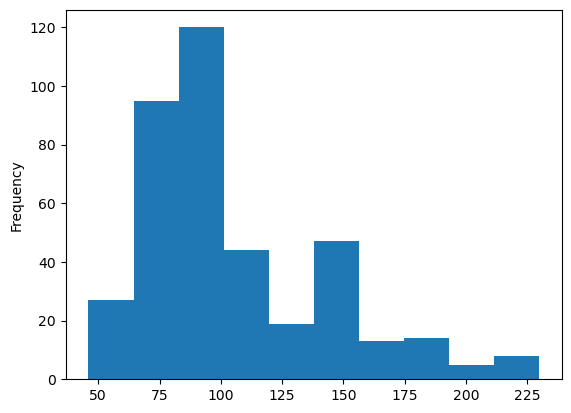

In [113]:
auto.horsepower.plot.hist()

<Axes: ylabel='Frequency'>

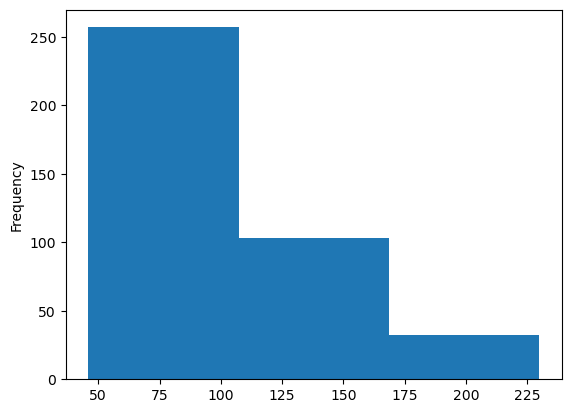

In [114]:
auto.horsepower.plot.hist(bins=3)

In [117]:
freq, bins = np.histogram(auto.horsepower, bins=3)
#257개, 103개, 32개 빈도
freq, bins

(array([257, 103,  32]),
 array([ 46.        , 107.33333333, 168.66666667, 230.        ]))

In [126]:
auto['hp_cat'] = pd.cut(auto.horsepower, bins=bins, 
                        labels=['저출력','보통출력','고출력'])
                        # include_lowest=True) #46 포함시키기 
auto[['horsepower', 'hp_cat']]

,horsepower,hp_cat
0,130.0,보통출력
1,165.0,보통출력
2,150.0,보통출력
3,150.0,보통출력
4,140.0,보통출력
...,...,...
393,86.0,저출력
394,52.0,저출력
395,84.0,저출력
396,79.0,저출력


In [120]:
auto.hp_cat.value_counts()

hp_cat
저출력     257
보통출력    103
고출력      32
Name: count, dtype: int64

### 2) 더미(dummy) 변수

- 범주형 데이터를 회귀분석의 입력변수로 사용할 경우 범주형 변수의 데이터 값들을 0 또는 1의 값을 갖는 더미변수로 변환해주어야 함
- 크고 작음 보다는 어떤 특성이 있는지 없는지 여부만 표시
- 원핫인코딩(one-hot encoding)
- pd.get_dummies() 함수

https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html?highlight=get_dummies#

#### 'hp_cat' 컬럼을 더미변수로 변환

In [129]:
pd.get_dummies(auto.hp_cat)

,저출력,보통출력,고출력
0,False,True,False
1,False,True,False
2,False,True,False
3,False,True,False
4,False,True,False
...,...,...,...
393,True,False,False
394,True,False,False
395,True,False,False
396,True,False,False


In [128]:
pd.get_dummies(auto.hp_cat, dtype=int)

,저출력,보통출력,고출력
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
393,1,0,0
394,1,0,0
395,1,0,0
396,1,0,0


### 2-3. 정규화(normalization)

- 숫자 데이터의 상대적인 크기 차이를 제거하기 위해, 데이터 값을 동일한 크기 기준으로 나눈 비율로 나타낸 변환
- 특성 벡터의 길이는 상관 없고 데이터의 방향만이 중요할 때 많이 사용

#### 데이터를 최대값(의 절대값)으로 나눔

In [130]:
auto.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,km/L,hp_cat
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA,chevrolet chevelle malibu,7.65,보통출력
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA,buick skylark 320,6.38,보통출력
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA,plymouth satellite,7.65,보통출력


In [131]:
auto.horsepower.describe()

count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: horsepower, dtype: float64

In [133]:
hp1 = auto.horsepower/abs(auto.horsepower.max()) #abs 절대값
hp1.describe()

count    392.000000
mean       0.454215
std        0.167353
min        0.200000
25%        0.326087
50%        0.406522
75%        0.547826
max        1.000000
Name: horsepower, dtype: float64

#### min-max scaling : 최소값은 0, 최대값은 1이 되도록 변환

In [134]:
min_max = auto.horsepower.max() - auto.horsepower.min()
min_x = auto.horsepower-auto.horsepower.min() 
hp2 = min_x / min_max
hp2.describe()

count    392.000000
mean       0.317768
std        0.209191
min        0.000000
25%        0.157609
50%        0.258152
75%        0.434783
max        1.000000
Name: horsepower, dtype: float64

#### 표준화(Standardization)

- Z-score 정규화
- 평균은 0, 표준편차는 1이 되도록 변환
- 이상치 파악

In [136]:
hp3 = (auto.horsepower - auto.horsepower.mean())/auto.horsepower.std()
hp3.describe()

count    3.920000e+02
mean    -1.631348e-16
std      1.000000e+00
min     -1.519034e+00
25%     -7.656144e-01
50%     -2.849846e-01
75%      5.593651e-01
max      3.261284e+00
Name: horsepower, dtype: float64

### 2-4. 시계열 데이터 처리

- 시계열 데이터를 데이터프레임의 행 인덱스로 사용하면 시간으로 기록된 데이터 분석에 매우 용이함
- Timestamp : 특정한 시점을 기록
- Period : 두 시점 사이의 일정한 기간

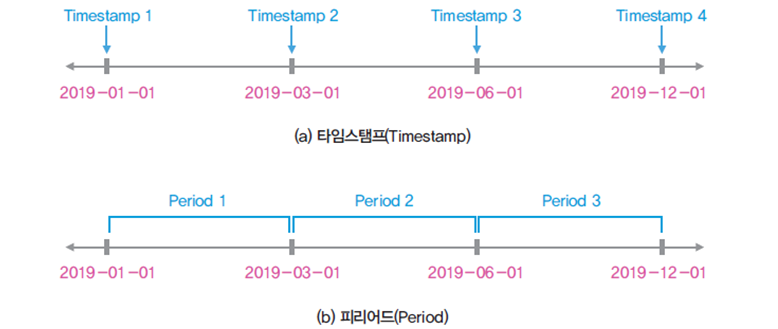

- 다른 자료형을 시계열 객체로 변환
    - 문자열을 Timestamp로 변환 : to_datetime()
    - Timestamp를 Period로 변환 : to_period()  
    
    
- 시계열 데이터 생성
    - Timestamp 배열 : date_range()
    - Period 배열 : period_range()
    
    
- 시계열 데이터 활용 : 날짜 데이터 분리, 날짜 인덱스 활용

https://pandas.pydata.org/docs/user_guide/timeseries.html

### 1) 다른 자료형을 시계열 객체로 변환

#### ① 문자열을 Timestamp로 변환 : pd.to_datetime()

to_datetime(arg, errors='raise', dayfirst=False, yearfirst=False, utc=None, format=None, exact=True, unit=None, infer_datetime_format=False, origin='unix', cache=True)

- datetime64 자료형으로 변환

https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html

#### 예제. 주식 거래 데이터(Netflex)

In [138]:
stock = pd.read_csv('NFLX.csv')
stock.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400


In [139]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4874 entries, 0 to 4873
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4874 non-null   object 
 1   Open       4874 non-null   float64
 2   High       4874 non-null   float64
 3   Low        4874 non-null   float64
 4   Close      4874 non-null   float64
 5   Adj Close  4874 non-null   float64
 6   Volume     4874 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 266.7+ KB


- Date 컬럼 : 문자열(object)을 Timestamp 객체로 변환

In [140]:
stock['new_date'] = pd.to_datetime(stock.Date)
stock.head(3)
stock.info()

,Date,Open,High,Low,Close,Adj Close,Volume,new_date
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000,2002-05-23
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800,2002-05-24
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400,2002-05-28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4874 entries, 0 to 4873
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4874 non-null   object        
 1   Open       4874 non-null   float64       
 2   High       4874 non-null   float64       
 3   Low        4874 non-null   float64       
 4   Close      4874 non-null   float64       
 5   Adj Close  4874 non-null   float64       
 6   Volume     4874 non-null   int64         
 7   new_date   4874 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 304.8+ KB


In [141]:
stock.loc[0, 'new_date']

Timestamp('2002-05-23 00:00:00')

#### 시계열값(Timestamp)을 인덱스로 설정
- 인덱스 및 슬라이싱하기 편리함

In [142]:
stock.set_index('new_date', inplace=True)
stock.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
new_date,,,,,,,
2002-05-23,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
2002-05-24,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2002-05-28,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400


In [143]:
stock.drop('Date', axis=1, inplace=True)

In [144]:
stock.head(3)

,Open,High,Low,Close,Adj Close,Volume
new_date,,,,,,
2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400


In [145]:
stock.index

DatetimeIndex(['2002-05-23', '2002-05-24', '2002-05-28', '2002-05-29',
               '2002-05-30', '2002-05-31', '2002-06-03', '2002-06-04',
               '2002-06-05', '2002-06-06',
               ...
               '2021-09-17', '2021-09-20', '2021-09-21', '2021-09-22',
               '2021-09-23', '2021-09-24', '2021-09-27', '2021-09-28',
               '2021-09-29', '2021-09-30'],
              dtype='datetime64[ns]', name='new_date', length=4874, freq=None)

- 2018년 6월 데이터 추출

In [146]:
stock.loc['2018-06'] #2018-06으로 시작하는것 다 추출됨

,Open,High,Low,Close,Adj Close,Volume
new_date,,,,,,
2018-06-01,353.880005,359.989990,352.820007,359.929993,359.929993,7112300
2018-06-04,362.679993,363.000000,355.510010,361.809998,361.809998,7682000
2018-06-05,363.320007,369.829987,361.410004,365.799988,365.799988,8358000
2018-06-06,367.779999,369.679993,363.329987,367.450012,367.450012,7712300
2018-06-07,368.540009,368.700012,357.799988,361.399994,361.399994,8278000
2018-06-08,358.059998,362.390015,356.250000,360.570007,360.570007,5225700
2018-06-11,361.880005,365.670013,360.910004,361.450012,361.450012,4432400
2018-06-12,363.600006,365.980011,362.000000,363.829987,363.829987,4291000
2018-06-13,367.529999,384.250000,364.109985,379.929993,379.929993,18222800


- 2018년 6월~7월 데이터 추출

In [148]:
stock.loc['2018-06':'2018-07']

,Open,High,Low,Close,Adj Close,Volume
new_date,,,,,,
2018-06-01,353.880005,359.989990,352.820007,359.929993,359.929993,7112300
2018-06-04,362.679993,363.000000,355.510010,361.809998,361.809998,7682000
2018-06-05,363.320007,369.829987,361.410004,365.799988,365.799988,8358000
2018-06-06,367.779999,369.679993,363.329987,367.450012,367.450012,7712300
2018-06-07,368.540009,368.700012,357.799988,361.399994,361.399994,8278000
2018-06-08,358.059998,362.390015,356.250000,360.570007,360.570007,5225700
2018-06-11,361.880005,365.670013,360.910004,361.450012,361.450012,4432400
2018-06-12,363.600006,365.980011,362.000000,363.829987,363.829987,4291000
2018-06-13,367.529999,384.250000,364.109985,379.929993,379.929993,18222800


- 2018년 6월25일~7월10일 데이터 추출

In [149]:
stock.loc['2018-06-25':'2018-07-10'] #월에 06 이런식으로 0 꼭 넣어주기

,Open,High,Low,Close,Adj Close,Volume
new_date,,,,,,
2018-06-25,404.690002,405.989990,378.750000,384.480011,384.480011,22490900
2018-06-26,393.279999,404.779999,389.049988,399.390015,399.390015,15191200
2018-06-27,407.559998,411.589996,390.000000,390.390015,390.390015,16541400
2018-06-28,395.000000,396.899994,387.100006,395.420013,395.420013,12219900
2018-06-29,399.190002,401.329987,390.549988,391.429993,391.429993,9252500
2018-07-02,385.450012,398.380005,380.000000,398.179993,398.179993,8142500
2018-07-03,399.489990,399.980011,389.500000,390.519989,390.519989,5280300
2018-07-05,393.799988,399.239990,390.859985,398.390015,398.390015,8448900
2018-07-06,397.450012,408.649994,395.519989,408.250000,408.250000,8629600


#### ② Timestamp를 Period로 변환 : Timestamp.to_period(freq='D'|'M'|'A')

- Timestamp 객체를 일정한 기간을 나타내는 Period 객체로 변환
- DatetimeIndex가 PeriodIndex로 변환
- 자료형은 datetime64에서 period로 변환

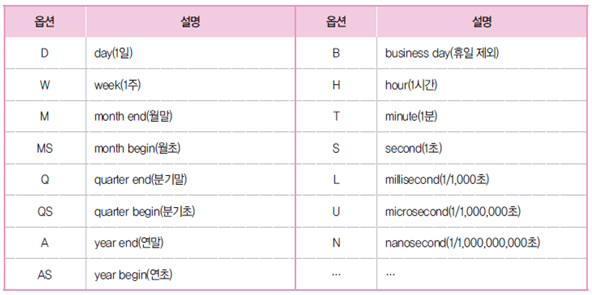

In [150]:
dates = ['2019-01-01', '2020-03-01', '2021-06-01']
ts_dates = pd.to_datetime(dates)
ts_dates

DatetimeIndex(['2019-01-01', '2020-03-01', '2021-06-01'], dtype='datetime64[ns]', freq=None)

In [151]:
ts_dates.to_period(freq='D') #freqency Day

PeriodIndex(['2019-01-01', '2020-03-01', '2021-06-01'], dtype='period[D]')

In [152]:
ts_dates.to_period(freq='M') #freqency Month

PeriodIndex(['2019-01', '2020-03', '2021-06'], dtype='period[M]')

In [153]:
ts_dates.to_period(freq='A') #freqency Annual

PeriodIndex(['2019', '2020', '2021'], dtype='period[A-DEC]')

### 2) 시계열 데이터 생성

#### Timestamp 배열 생성 : date_range() 함수 사용

- date_range(start=None, end=None, periods=None, freq=None, tz=None, normalize=False, name=None, closed=_NoDefault.no_default, inclusive=None, **kwargs)
- DatetimeIndex 생성
- https://pandas.pydata.org/docs/reference/api/pandas.date_range.html

In [154]:
pd.date_range(start='2020-01-01', periods=6, freq='MS', tz='Asia/Seoul')

DatetimeIndex(['2020-01-01 00:00:00+09:00', '2020-02-01 00:00:00+09:00',
               '2020-03-01 00:00:00+09:00', '2020-04-01 00:00:00+09:00',
               '2020-05-01 00:00:00+09:00', '2020-06-01 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='MS')

In [158]:
pd.date_range(start='2020-01-01', periods=6, freq='MS', tz='America/New_york')

DatetimeIndex(['2020-01-01 00:00:00-05:00', '2020-02-01 00:00:00-05:00',
               '2020-03-01 00:00:00-05:00', '2020-04-01 00:00:00-04:00',
               '2020-05-01 00:00:00-04:00', '2020-06-01 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', freq='MS')

#### Period 배열 생성 : period_range() 함수 사용

- period_range(start=None, end=None, periods=None, freq=None, name=None)
- PeriodIndex 생성
- https://pandas.pydata.org/docs/reference/api/pandas.period_range.html

In [162]:
pd.period_range(start='2020-01-01', periods=3, freq='M')

PeriodIndex(['2020-01', '2020-02', '2020-03'], dtype='period[M]')

In [161]:
pd.period_range(start='2020-01-01', periods=3, freq='D')

PeriodIndex(['2020-01-01', '2020-01-02', '2020-01-03'], dtype='period[D]')

In [160]:
pd.period_range(start='2020-01-01', periods=3, freq='H')

PeriodIndex(['2020-01-01 00:00', '2020-01-01 01:00', '2020-01-01 02:00'], dtype='period[H]')

In [159]:
pd.period_range(start='2020-01-01', periods=3, freq='2H') #2시간 간격

PeriodIndex(['2020-01-01 00:00', '2020-01-01 02:00', '2020-01-01 04:00'], dtype='period[2H]')

In [159]:
pd.period_range(start='2020-01-01', periods=3, freq='5S') #5초 간격

PeriodIndex(['2020-01-01 00:00', '2020-01-01 02:00', '2020-01-01 04:00'], dtype='period[2H]')

### 3) 시계열 데이터 활용

#### 날짜 데이터 분리

- 연-월-일 정보를 연, 월, 일 각각으로 구분

In [163]:
# 주식데이터 : data/NFLX.csv
stock = pd.read_csv('NFLX.csv')
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


- **Timestamp 객체**는 연, 월, 일, 시, 분, 초로 추출가능
    - Series.dt.year
    - Series.dt.month
    - Series.dt.day
    - Series.dt.hour
    - Series.dt.minute
    - Series.dt.second

In [164]:
stock['new_date'] = pd.to_datetime(stock.Date)
stock.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume,new_date
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000,2002-05-23
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800,2002-05-24


In [165]:
stock['Year'] = stock.new_date.dt.year
stock['Month'] = stock.new_date.dt.month
stock['Day'] = stock.new_date.dt.day
stock.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume,new_date,Year,Month,Day
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000,2002-05-23,2002,5,23
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800,2002-05-24,2002,5,24


- **Period 객체**에서 연-월 또는 연도 추출

In [168]:
stock['DateYear'] = stock.new_date.dt.to_period(freq='A')
stock['DateMonth'] = stock.new_date.dt.to_period(freq='M')
stock['DateDay'] = stock.new_date.dt.to_period(freq='D')
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume,new_date,Year,Month,Day,DateYear,DateMonth,DateDay
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000,2002-05-23,2002,5,23,2002,2002-05,2002-05-23
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800,2002-05-24,2002,5,24,2002,2002-05,2002-05-24
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400,2002-05-28,2002,5,28,2002,2002-05,2002-05-28
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800,2002-05-29,2002,5,29,2002,2002-05,2002-05-29
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200,2002-05-30,2002,5,30,2002,2002-05,2002-05-30


#### 날짜 인덱스 활용

In [169]:
stock.set_index('new_date', inplace=True)
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,DateYear,DateMonth,DateDay
new_date,,,,,,,,,,,,,
2002-05-23,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000,2002,5,23,2002,2002-05,2002-05-23
2002-05-24,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800,2002,5,24,2002,2002-05,2002-05-24
2002-05-28,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400,2002,5,28,2002,2002-05,2002-05-28
2002-05-29,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800,2002,5,29,2002,2002-05,2002-05-29
2002-05-30,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200,2002,5,30,2002,2002-05,2002-05-30


In [170]:
stock['time_delta'] = pd.to_datetime('2010-01-01') - stock.index
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,DateYear,DateMonth,DateDay,time_delta
new_date,,,,,,,,,,,,,,
2002-05-23,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000,2002,5,23,2002,2002-05,2002-05-23,2780 days
2002-05-24,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800,2002,5,24,2002,2002-05,2002-05-24,2779 days
2002-05-28,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400,2002,5,28,2002,2002-05,2002-05-28,2775 days
2002-05-29,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800,2002,5,29,2002,2002-05,2002-05-29,2774 days
2002-05-30,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200,2002,5,30,2002,2002-05,2002-05-30,2773 days


---------------------------------------